In [1]:
import pandas as pd

data = pd.read_excel('Online Retail.xlsx')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37290 entries, 0 to 37289
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    37290 non-null  object        
 1   StockCode    37290 non-null  object        
 2   Description  37173 non-null  object        
 3   Quantity     37290 non-null  int64         
 4   InvoiceDate  37290 non-null  datetime64[ns]
 5   UnitPrice    37290 non-null  float64       
 6   CustomerID   24411 non-null  float64       
 7   Country      37290 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.3+ MB


In [2]:
# clean the data 
data = data.dropna()
# data = data.drop_duplicates(inplace=True)s
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24411 entries, 0 to 37289
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    24411 non-null  object        
 1   StockCode    24411 non-null  object        
 2   Description  24411 non-null  object        
 3   Quantity     24411 non-null  int64         
 4   InvoiceDate  24411 non-null  datetime64[ns]
 5   UnitPrice    24411 non-null  float64       
 6   CustomerID   24411 non-null  float64       
 7   Country      24411 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.7+ MB


In [12]:
# Clean the Data

#Check for missing values
data = data.dropna()

# Check for duplicates
data = data.drop_duplicates()

data.info()  # Nga 406,829 kemi 401,604

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23942 entries, 0 to 37289
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    23942 non-null  object        
 1   StockCode    23942 non-null  object        
 2   Description  23942 non-null  object        
 3   Quantity     23942 non-null  int64         
 4   InvoiceDate  23942 non-null  datetime64[ns]
 5   UnitPrice    23942 non-null  float64       
 6   CustomerID   23942 non-null  float64       
 7   Country      23942 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.6+ MB


In [4]:
# get descrbe for quantity and unit price
data[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,23942.000000,23942.000000
mean,10.927199,3.207419
std,75.973387,6.160449
min,-9360.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,2.100000
75%,12.000000,3.750000
max,2880.000000,295.000000


Step 2: Data Analysis (Non-Relational)
Analyze Continuous Variables (Quantity and UnitPrice)Step 2: Data Analysis (Non-Relational)
Analyze Continuous Variables (Quantity and UnitPrice)

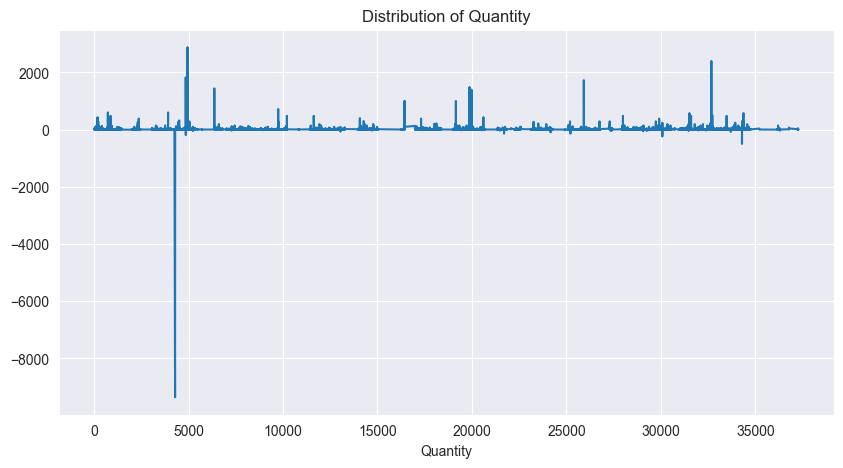

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Quantity
plt.figure(figsize=(10, 5))
plt.plot(data['Quantity'])
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.show()

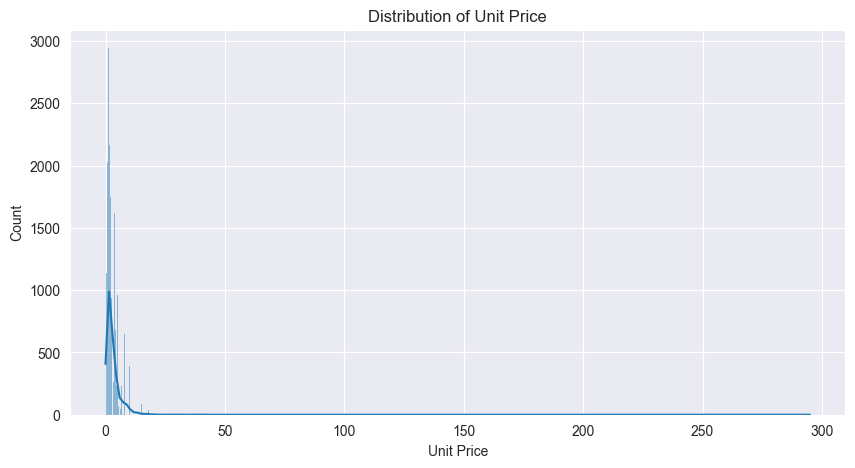

In [14]:
# Histogram for UnitPrice
plt.figure(figsize=(10, 5))
sns.histplot(data['UnitPrice'], kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.show()

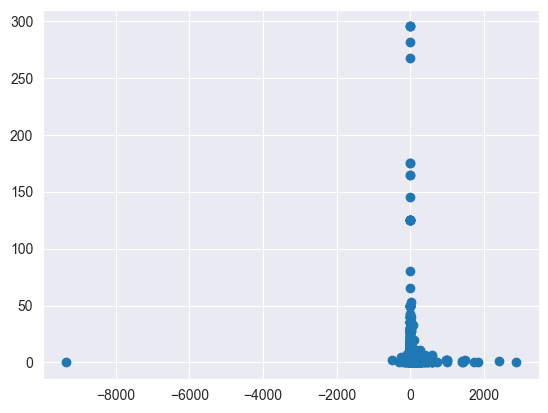

In [16]:
# chose dependent and independent variables
X = data[['Quantity']]
y = data['UnitPrice']

plt.scatter(X, y)

In [17]:
def drop_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

Text(0.5, 1.0, 'Scatter Quantity and Unit Price')

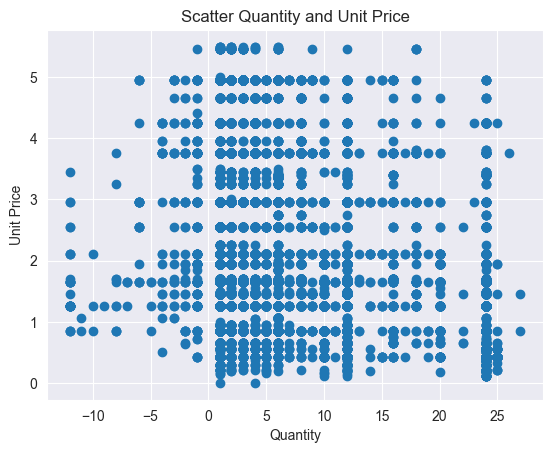

In [22]:
data = drop_outliers(data, 'Quantity')
data = drop_outliers(data, 'UnitPrice')

plt.scatter(data['Quantity'], data['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Quantity and Unit Price')

Model Evaluation:
Mean Squared Error (MSE): 1.482160215578614
R-squared (R2): 0.08805564134578714


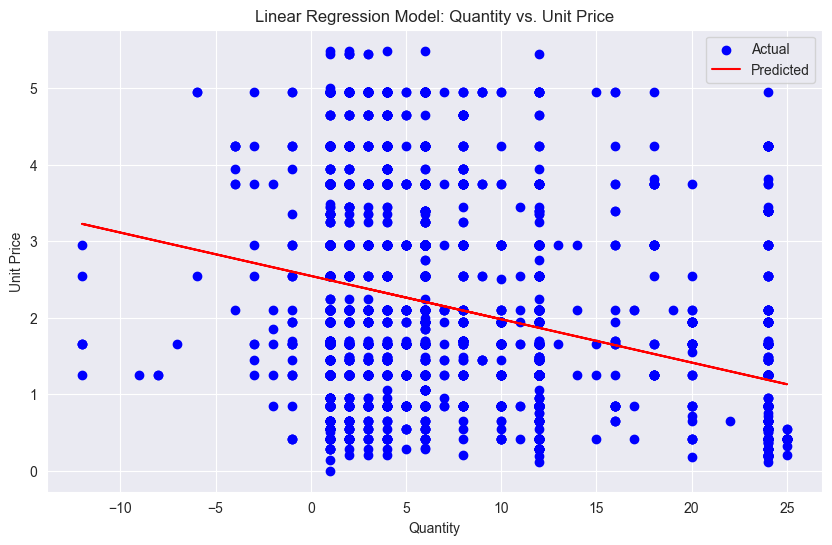

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data_cleaned = drop_outliers(data, 'Quantity')
data_cleaned = drop_outliers(data_cleaned, 'UnitPrice')
# Step 1: Define features (X) and target (y)
X = data_cleaned[['Quantity']]  # Using Quantity to predict UnitPrice
y = data_cleaned['UnitPrice']

# Step 2: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Optional: Visualize the regression line on a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression Model: Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
plt.show()


In [26]:
# make a accuracy score for linear regression

y_pred  = model.coef_ + model.intercept_ * X_test
y_pred

,Quantity
21490,7.583696
32982,15.224028
475,30.504691
31750,10.130474
31320,5.036919
...,...
28384,15.224028
4208,10.130474
17016,10.130474
27376,61.066018
